# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ahmad Rizhan]
- **Email:** [rizhan25@gmail.com]
- **ID Dicoding:** [ahmad_rizhan]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

## Data Wrangling

### Gathering Data

In [20]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
df.shape

(731, 16)

**Insight:**
- Dataset memiliki 731 baris dan 16 Kolom
- Dataset ini berisi informasi tentang jumlah penyewaan sepeda per hari selama periode tertentu
- Beberapa kolom yang terlihat penting untuk analisis antara lain season, weathersit, dan cnt, di mana kolom cnt menunjukkan total penyewaan sepeda dalam satu hari.

### Assessing Data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Berdasarkan hasil pengecekan, seluruh kolom memiliki jumlah data yang sama yaitu 731 baris, sehingga tidak ditemukan adanya missing value pada dataset ini.
- Struktur data sudah cukup rapi dan tidak terlihat adanya ketidaksesuaian jumlah data antar kolom.
- Kolom dteday masih bertipe object, sehingga nantinya bisa dipertimbangkan untuk diubah ke format datetime agar lebih mudah dianalisis berdasarkan waktu.
- Beberapa kolom seperti season dan weathersit masih berupa angka kategori, sehingga perlu diubah menjadi label yang lebih deskriptif agar hasil analisis dan visualisasi lebih mudah dipahami.

In [24]:
df.duplicated().sum()

np.int64(0)

Insight:

- Hasil pemeriksaan menunjukkan bahwa tidak terdapat data duplikat pada dataset ini.
- Seluruh data tercatat secara unik untuk setiap hari, sehingga tidak diperlukan penghapusan data duplikat.
- Secara umum, kualitas data sudah cukup baik dan siap untuk masuk ke tahap pembersihan dan analisis lebih lanjut.


### Cleaning Data

In [25]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [26]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain'
}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)

In [27]:
df[['season','weathersit']].head()

,season,weathersit
0,Spring,Mist
1,Spring,Mist
2,Spring,Clear
3,Spring,Clear
4,Spring,Clear


**Insight:**
- Pada tahap pembersihan data, kolom dteday telah diubah ke format datetime agar lebih mudah dianalisis berdasarkan waktu.
- Kolom season dan weathersit yang sebelumnya berupa kode angka telah dikonversi menjadi label kategori yang lebih deskriptif seperti Spring, Summer, Clear, dan Mist.
- Perubahan ini bertujuan agar proses analisis dan visualisasi menjadi lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
df.groupby('season')['cnt'].mean()

,cnt
season,
Fall,5644.303191
Spring,2604.132597
Summer,4992.331522
Winter,4728.162921


**Insight:**
- Rata-rata jumlah penyewaan sepeda tertinggi terjadi pada musim Fall.
- Musim Spring memiliki rata-rata penyewaan paling rendah dibandingkan musim lainnya.
- Musim Summer dan Winter menunjukkan jumlah penyewaan yang cukup tinggi, meskipun masih berada di bawah musim Fall.
- Hal ini menunjukkan bahwa faktor musim memiliki pengaruh terhadap tingkat penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

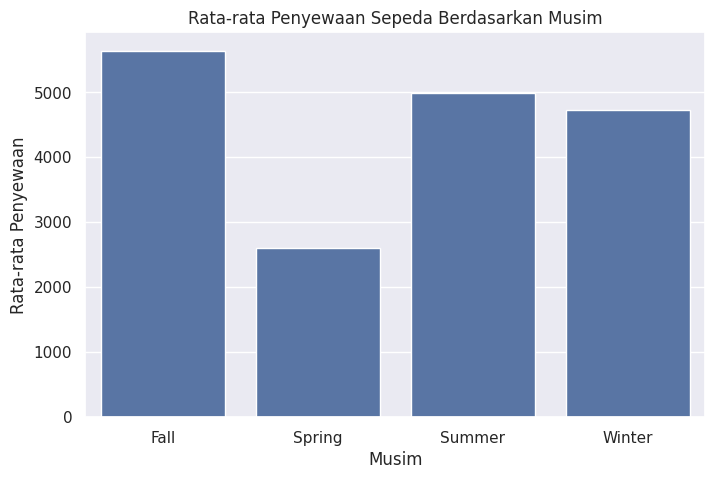

In [29]:
season_avg = df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=season_avg, x='season', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**

- Grafik menunjukkan bahwa musim Fall memiliki rata-rata penyewaan sepeda tertinggi dibandingkan musim lainnya.
- Musim Spring terlihat memiliki jumlah penyewaan paling rendah, sehingga kemungkinan terdapat faktor musiman yang memengaruhi minat pengguna.
- Musim Summer dan Winter tetap menunjukkan tingkat penyewaan yang cukup tinggi, meskipun tidak setinggi musim Fall.
- Secara keseluruhan, pola ini memperlihatkan bahwa kondisi musim berpengaruh terhadap permintaan penyewaan sepeda

### Pertanyaan 2:

In [30]:
df.groupby('weathersit')['cnt'].mean()

,cnt
weathersit,
Clear,4876.786177
Light Snow/Rain,1803.285714
Mist,4035.862348


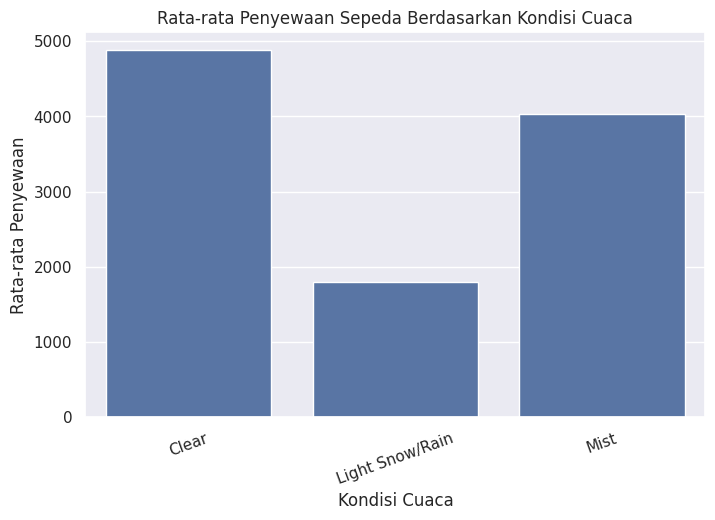

In [31]:
weather_avg = df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weather_avg, x='weathersit', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=20)
plt.show()

**Insight:**

- Grafik menunjukkan bahwa kondisi cuaca Clear memiliki rata-rata penyewaan sepeda tertinggi dibandingkan kondisi lainnya.
- Pada kondisi Mist, jumlah penyewaan masih cukup tinggi, namun tetap lebih rendah dibandingkan kondisi cerah.
- Kondisi Light Snow/Rain memperlihatkan penurunan yang cukup signifikan dalam jumlah penyewaan.
- Secara umum, semakin buruk kondisi cuaca, semakin rendah tingkat penggunaan sepeda oleh masyarakat.

## Analisis Lanjutan (Opsional)

In [32]:
yearly_avg = df.groupby('yr')['cnt'].mean().reset_index()

yearly_avg

,yr,cnt
0,0,3405.761644
1,1,5599.934426


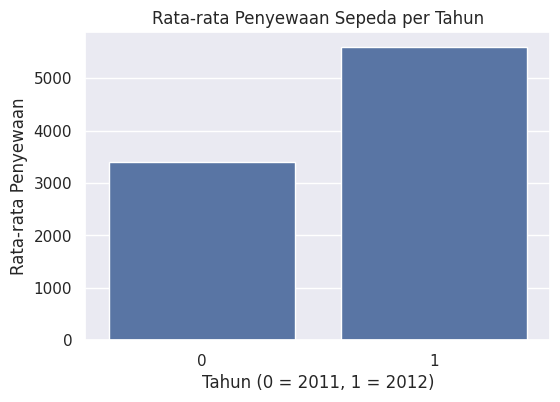

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(data=yearly_avg, x='yr', y='cnt')
plt.title('Rata-rata Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun (0 = 2011, 1 = 2012)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Terlihat adanya perbedaan rata-rata penyewaan sepeda antara tahun pertama dan tahun kedua.
- Tahun kedua menunjukkan rata-rata penyewaan yang lebih tinggi dibandingkan tahun pertama.
- Hal ini mengindikasikan adanya peningkatan minat atau pertumbuhan penggunaan sepeda dari waktu ke waktu.

## Conclusion

- Musim berpengaruh terhadap jumlah penyewaan sepeda. Musim Fall memiliki rata-rata penyewaan tertinggi, sedangkan Spring menunjukkan jumlah terendah.
- Kondisi cuaca juga berpengaruh terhadap tingkat penyewaan sepeda. Cuaca cerah meningkatkan jumlah penyewaan, sementara kondisi hujan atau salju ringan menyebabkan penurunan yang cukup signifikan.